Randomly-colliding particles on a line (1D)
===

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
#Time range and small step :
t0 = 0
tf = 1
t = np.linspace(t0, tf, 5000)
tsize = np.size(t)

#Length of the 1D line [0, L] :
L = 1000

### Initialisation

In [4]:
#Maximum particle size :
max_size = int(input("Enter the maximum particle size possible = "))

#Initial array of the concentration of population :
n = np.zeros((tsize, max_size))
nb_particles = 0

for i in range(0, max_size):
    n[0, i] = int(input("Enter the initial condition of n_%d = " %(i+1)))
    nb_particles = int(nb_particles + n[0, i])

print("Number of particles = ", nb_particles)
#print(n)

Enter the maximum particle size possible =  3
Enter the initial condition of n_1 =  50
Enter the initial condition of n_2 =  0
Enter the initial condition of n_3 =  0


Number of particles =  50


In [5]:
#Initial positions of nb_particles in the line of length L (without 2 particles at the same position) :
rand_positions = np.random.choice(L, nb_particles, replace=False)

#2D array of size + position for each particle : ps = [[size r_i, position_i], ...] :

ps = np.empty([0,2])
#Add the right number of particles of size r according to the initial conditions given above :
for i in range(max_size) :
    ps = np.concatenate( (ps, (i+1)*np.ones([ int(n[0,i]) , 2])) )
    
#Add the random positions x on the array
for i in range(nb_particles) :
    ps[i, 1] = rand_positions[i]

print(ps)

[[  1. 229.]
 [  1.   3.]
 [  1. 548.]
 [  1. 686.]
 [  1. 333.]
 [  1. 835.]
 [  1. 895.]
 [  1. 223.]
 [  1. 199.]
 [  1. 192.]
 [  1. 680.]
 [  1. 353.]
 [  1. 539.]
 [  1. 816.]
 [  1. 195.]
 [  1.  86.]
 [  1. 546.]
 [  1. 475.]
 [  1. 608.]
 [  1. 983.]
 [  1.  76.]
 [  1. 810.]
 [  1. 423.]
 [  1. 712.]
 [  1. 611.]
 [  1. 232.]
 [  1. 814.]
 [  1. 308.]
 [  1. 208.]
 [  1.  74.]
 [  1. 555.]
 [  1. 660.]
 [  1. 522.]
 [  1. 589.]
 [  1. 146.]
 [  1. 355.]
 [  1. 274.]
 [  1. 249.]
 [  1. 713.]
 [  1. 923.]
 [  1. 489.]
 [  1. 864.]
 [  1. 886.]
 [  1. 289.]
 [  1. 986.]
 [  1. 726.]
 [  1. 992.]
 [  1. 341.]
 [  1. 122.]
 [  1. 947.]]


##### Things to keep in mind :
- the particles are not point-like : there is collision if the distance between 2 particles is smaller than the spatial step
- if nothing happens, the concentrations stay the same than before

##### Allowed collision or not ?
Before allowing a collision to happen, we need to check if the size of the created particle is smaller or equal to max_size. 
If there are only 2 particles on a same position, we just have to check the addition of their sizes.
But if there are more than 2 particles (p1, p2, p3, ..., px, ...) on a same position, we proceed by colliding particles one by one :
- p1 collides with p2 if s1+s2<= max_size, p1 becomes the new particle of size s1+s2 and p2 is removed 
- p1 collides with p3 if s1+s3<= max_size, p1 becomes the new particle of size s1+s3 and p3 is removed
- ...
- when s1+sx > max_size, the collision is not allowed, p1 and px stays at their position. 

This way of thinking allows us to define allowed collisions and to solve the issue of several particles at the same position !

In [8]:
print(np.shape(ps)[0]-1)

48


In [16]:
#For every time t :
for t_i in range(1, tsize) : 
    
    #Random moves of step = +/- 1 for each particle :
    for i in range(np.shape(ps)[0]) :
        step = random.randint(1, 2)
        if step==1 : #move to the right
            ps[i, 1] += 1
        elif step==2 : #move to the left
            ps[i, 1] -= 1
    
    #Initialisation of concentrations for each size r :
    #If there are no collisions at t_i, they will stay as they were at t_i-1
    for r in range(max_size) :
        n[t_i, r] = n[ t_i-1, r]

    #Collisions and evolution of concentrations :
    for i in range( np.shape(ps)[0] ) : # loops for each particle in the simulation
        for j in range( i+1, np.shape(ps)[0]-1 ) : # loops through each other particle in the simulation
            
            if abs(ps[i, 1] - ps[j, 1]) < 1 :  # distance between 2 particles smaller than spatial step
                if ps[i, 0] + ps[j, 0] <= max_size : # AND collision allowed by the maximum particle size
                    
                    #Loss in concentration from particle i and j which are colliding :
                    #EXAMPLE : if particle i is size s_i=1, ps[i,0]=1 so its corresponding concentration is n[t,0]=n[t, ps[i,0-1] ]
                    n[ t_i, int(ps[i,0]-1) ] -= 1 
                    n[ t_i, int(ps[j,0]-1) ] -= 1 
                    
                    #the size of the new particle created by the collision increases ;
                    #we stock this new particle in the index i
                    ps[i, 0] = ps[i, 0] + ps[j, 0]
                    
                    #Gain in concentration of size s_i+s_j = ps[i,0] according to the eq above :
                    n[ t_i, int(ps[i, 0]-1) ] += 1
                    
                    #The particle j is removed from the array :
                    ps = np.delete(ps, j, 0)

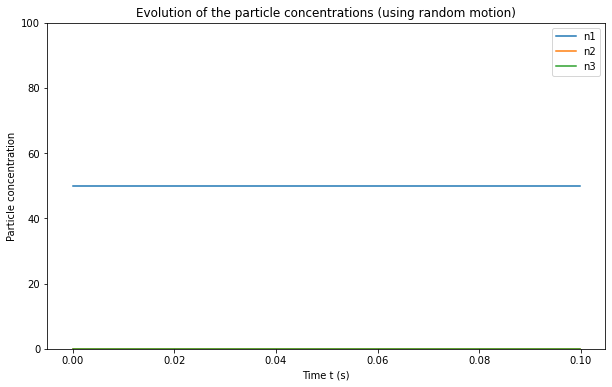

In [17]:
#Plot of the evolution of the concentrations :
plt.figure(figsize=(10,6))
plt.title("Evolution of the particle concentrations (using random motion)")
plt.xlabel("Time t (s)")
plt.ylabel("Particle concentration")
for r in range(max_size) :
    plt.plot(t[:500], n[:500, r], label="n%d"%(r+1))
    
plt.legend()
plt.ylim(0,100)
plt.show()

We have steps : normal because when there is collision, n1 loses 2 particles and n2 increases from 1 -> this is not continuous, it's discrete

In [18]:
print(n[4, 0])
print(n[4, 1])

for k in range(tsize) :
    if n[k, 1] - n[k, 0] <= 2 and n[k, 1] - n[k, 0] >= 0 : #point when n2 becomes dominant
        print(k)
        print(t[k])
        break

50.0
0.0


### Conservation of the total mass

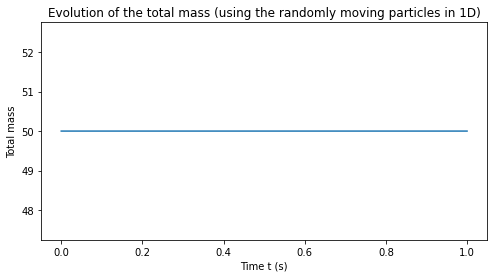

In [19]:
#Total mass :
def M(n) :
    sum=0
    for r in range(max_size) :
        sum = sum + (r+1)*n[:, r]
    return sum

plt.figure(figsize=(8,4))
plt.title("Evolution of the total mass (using the randomly moving particles in 1D)")
plt.xlabel("Time t (s)")
plt.ylabel("Total mass")

plt.plot(t, M(n))
plt.show()

Things to do :
- see the dependence of the length L on the result (like when the two concentrations are equal or really close)
- use that to find the right value of L to compare with the analytical solutions (the specific point needs to be at the same time than for the analytical for being able to compare them)
- make an illustration of the particles
- do it in 2D

### Role of the length L
##### If L increases, the particles will need more time to meet other particles and then the time that it takes to have equal concentrations will be longer
##### Let's study that by plotting the time when n1 = n2 (+/- 2 particles) according to different lengths L

In [68]:
#Same code than before but written in a function of L and array of time
#The max_size and the initial conditions stays the same (we can set up them in the head of the code)

def random_moves(L, t) :
    
    #Initial positions of nb_particles in the line of length L (without 2 particles at the same position) :
    rand_positions = np.random.choice(L, nb_particles, replace=False)

    #2D array of size + position for each particle : ps = [[size r_i, position_i], ...] :
    ps = np.empty([0,2])
    #Add the right number of particles of size r according to the initial conditions given above :
    for i in range(max_size) :
        ps = np.concatenate( (ps, (i+1)*np.ones([ int(n[0,i]) , 2])) )
    #Add the random positions x on the array
    for i in range(nb_particles) :
        ps[i, 1] = rand_positions[i]
    
    #For every time t :
    for t_i in range(1, tsize) : 

        #Random moves of step = +/- 1 for each particle :
        for i in range(np.shape(ps)[0]) :
            step = random.randint(1, 2)
            if step==1 : #move to the right
                ps[i, 1] += 1
            elif step==2 : #move to the left
                ps[i, 1] -= 1

        #Initialisation of concentrations for each size r :
        #If there are no collisions at t_i, they will stay as they were at t_i-1
        for r in range(max_size) :
            n[t_i, r] = n[ t_i-1, r]

        #Collisions and evolution of concentrations :
        for i in range( np.shape(ps)[0] ) :
            for j in range( i+1, np.shape(ps)[0]-1 ) :

                if abs(ps[i, 1] - ps[j, 1]) < 1 :  # distance between 2 particles smaller than spatial step
                    if ps[i, 0] + ps[j, 0] <= max_size : # AND collision allowed by the maximum particle size

                        #Loss in concentration from particle i and j which are colliding :
                        #EXAMPLE : if particle i is size s_i=1, ps[i,0]=1 so its corresponding concentration is n[t,0]=n[t, ps[i,0-1] ]
                        n[ t_i, int(ps[i,0]-1) ] -= 1 
                        n[ t_i, int(ps[j,0]-1) ] -= 1 

                        #the size of the new particle created by the collision increases ;
                        #we stock this new particle in the index i
                        ps[i, 0] = ps[i, 0] + ps[j, 0]

                        #Gain in concentration of size s_i+s_j = ps[i,0] according to the eq above :
                        n[ t_i, int(ps[i, 0]-1) ] += 1

                        #The particle j is removed from the array :
                        ps = np.delete(ps, j, 0)
    
    #Return the time when n2 becomes dominant :
    for k in range(np.size(t)) :
        if n[k, 1] - n[k, 0] <= 2 and n[k, 1] - n[k, 0] >= 0 : #point when n2 becomes dominant
            return t[k]

In [85]:
t = np.linspace(0, 1, 1000)
L_list = np.arange(100, 1000, 100) #note that we begin at L=100 because for L < nb_particles=100, we can't assign an unique position on the line at each particle
t_list = []

for L_i in L_list :
    t_list.append( random_moves(L_i, t) )

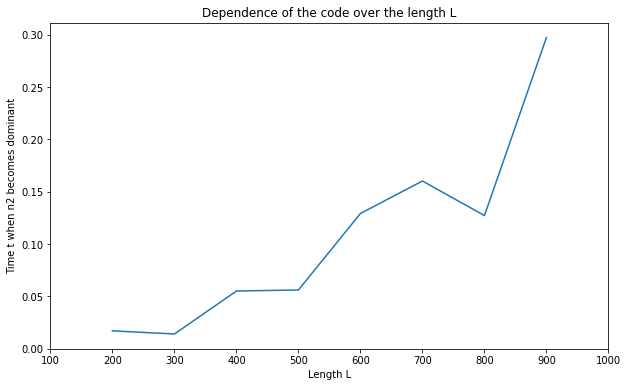

In [89]:
plt.figure(figsize=(10,6))
plt.title("Dependence of the code over the length L")
plt.xlabel("Length L")
plt.ylabel("Time t when n2 becomes dominant")
plt.plot(L_list, t_list)
plt.xlim(100, 1000)
plt.show()